In [1]:
#!/usr/bin/python

import numpy as np
import pyfits
import os
import environment_utils as envutils
import scipy
from scipy.stats import chisquare

from matplotlib import pyplot as plt
%matplotlib inline

from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib import gridspec
from matplotlib import rc, rcParams

# Make use of TeX
rc('text',usetex=True)

# Change all fonts to 'Computer Modern'
rc('font',**{'family':'serif','serif':['Computer Modern']})

In [2]:
envnames = ['Void', 'Sheet', 'Filament', 'Knot']
envcolors = ['#771122', '#AA7744', '#44AAAA', '#114477'] # figure 2

ranknames = ['Cen', 'Cen+Iso', 'Cen+Sat', 'All']
filename_ranks = ['_rankBCG1-2', '_rankBCGm999-2', '_rankBCG1-inf', '']
esds = dict()

path_filenames = '/disks/shear10/brouwer_veersemeer/pipeline_results/output_envS4bins/results_shearcovariance'
filenames_end = 'lw-mstarweight_Z_B0p005-1p2_Rbins10-20-2000kpc_Om0p315_Ol0p685_Ok0_h1_D.txt'

In [3]:
for r in xrange(len(ranknames)):
    print
    print ranknames[r]
    
    esdfiles = ['%s/shearcovariance_envS4bin%iof4_nQ3-inf%s_%s'%(path_filenames, i, filename_ranks[r], filenames_end) for i in np.arange(4)+1]

    # Importing the fitted ESD profiles
    data_x, data_y, error_h, error_l = envutils.read_esdfiles(esdfiles)
    
    esds[ranknames[r]] = np.array([data_y, error_h, error_l])


Cen
Imported ESD profiles: 4

Cen+Iso
Imported ESD profiles: 4

Cen+Sat
Imported ESD profiles: 4

All
Imported ESD profiles: 4


Written: ESD profile plot: ESD_profiles_ranks_combined.pdf


<function matplotlib.pyplot.clf>

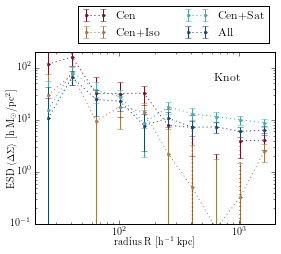

In [17]:
from matplotlib import gridspec
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

# Create a plot of the ESD profiles and halo model fit

# Define the labels for the plot
h=1
xlabel = r'radius R [$\rm h^{-1}$ kpc]'
ylabel = r'ESD $\langle\Delta\Sigma\rangle$ [h M$_{\odot}$/pc$^2$]'

Nrows = 1
Ncolumns = 1

# Plotting the ueber matrix
fig = plt.figure(figsize=(4,3))
canvas = FigureCanvas(fig)

gs_full = gridspec.GridSpec(1,1)
gs = gridspec.GridSpecFromSubplotSpec(Nrows, Ncolumns, wspace=0, hspace=0, subplot_spec=gs_full[0,0])

ax = fig.add_subplot(gs_full[0,0])

for N1 in xrange(Nrows):
    for N2 in xrange(Ncolumns):

        #env = N1*Nrows + N2    
        env = 3    

        ax_sub = fig.add_subplot(gs[N1, N2])
        
        # Plot the ESD profile
        (error_l[env])[(error_l[env])>=data_y[env]] = ((data_y[env][(error_l[env])>=data_y[env]])*0.9999999999)

        for r in xrange(len(ranknames)):
            
            data_y = esds[ranknames[r]][0]
            error_h = esds[ranknames[r]][1]
            error_l = esds[ranknames[r]][2]
            
            ax_sub.errorbar(data_x, data_y[env], yerr=[error_l[env], error_h[env]],\
                            ls=':', marker='.', color = envcolors[r], label = ranknames[r])
                    
        ax_sub.xaxis.set_label_position('top')
        ax_sub.yaxis.set_label_position('right')

        ax.tick_params(labelleft='off', labelbottom='off', top='off', bottom='off', left='off', right='off')
                
        if N2 != 0:
            ax_sub.tick_params(axis='y', labelleft='off')
        if N2 == Ncolumns-1:
            ax_sub.set_xticks(np.arange(9.,12.,0.5))
        else:
            ax_sub.set_xticks(np.arange(9.,11.5,0.5))
        
        
        plt.autoscale(enable=False, axis='both', tight=None)
        plt.axis([2e1,2e3,1e-1,1e3])
        plt.ylim(1e-1,2e2)
        plt.xscale('log')
        plt.yscale('log')
        
            
        plt.title(envnames[env], x = 0.8, y = 0.8)

lgd = ax_sub.legend(bbox_to_anchor=(1., 1.3), ncol=2)

# Define the labels for the plot
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

ax.xaxis.set_label_coords(0.5, -0.07)
ax.yaxis.set_label_coords(-0.07, 0.5)

#ax.xaxis.label.set_size(17)
#ax.yaxis.label.set_size(17)

    
plt.tight_layout()

# Save plot
filename = 'ESD_profiles_ranks_combined'
plotname = '%s.pdf'%filename

plt.savefig(plotname, format='pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')
print 'Written: ESD profile plot:', plotname

plt.clf

In [5]:
rmin = 0
#rmin = 5
#rmax = rmin + 5
rmax = 10
free = rmax - rmin - 1

for r in xrange(len(ranknames)):
    print
    print ranknames[r]
    data_y = esds[ranknames[r]][0]
    error_h = esds[ranknames[r]][1]
    error_l = esds[ranknames[r]][2]
    
    for i in np.arange(len(envnames)):
        for j in np.arange(i+1, len(envnames)):

            chi2 = np.sum((data_y[i,rmin:rmax] - data_y[j,rmin:rmax])**2 / (error_h[i,rmin:rmax]**2 + error_h[j,rmin:rmax]**2))
            p = 1 - scipy.stats.chi2.cdf(chi2, free)
            print i, j, 'chi2:', chi2, 'P(>chi2)', p, 'Independent:', p < 0.05
            



Cen
0 1 chi2: 10.0150764121 P(>chi2) 0.349266068884 Independent: False
0 2 chi2: 12.4918878166 P(>chi2) 0.186977210315 Independent: False
0 3 chi2: 11.5231841839 P(>chi2) 0.241543144318 Independent: False
1 2 chi2: 14.0136166354 P(>chi2) 0.121841681706 Independent: False
1 3 chi2: 8.79084030825 P(>chi2) 0.456801363696 Independent: False
2 3 chi2: 11.0050663065 P(>chi2) 0.275361826942 Independent: False

Cen+Iso
0 1 chi2: 4.16656641637 P(>chi2) 0.900111277785 Independent: False
0 2 chi2: 12.9838978252 P(>chi2) 0.163336223196 Independent: False
0 3 chi2: 9.64327509677 P(>chi2) 0.380128085781 Independent: False
1 2 chi2: 14.0129091774 P(>chi2) 0.121866764012 Independent: False
1 3 chi2: 9.8784756756 P(>chi2) 0.360412670663 Independent: False
2 3 chi2: 7.77531545452 P(>chi2) 0.556938118016 Independent: False

Cen+Sat
0 1 chi2: 7.53940471409 P(>chi2) 0.581143522738 Independent: False
0 2 chi2: 20.4021907852 P(>chi2) 0.0155862406952 Independent: True
0 3 chi2: 25.3914014306 P(>chi2) 0.00256